Plate Generation for Recognition

In [17]:
import random
import os
from PIL import Image, ImageDraw, ImageFont

# Define the root dataset directory
root_dir = r"C:\\Users\\HP\\Desktop\\NPR"
image_dir = os.path.join(root_dir, "train_images")
label_file = os.path.join(root_dir, "train_labels.txt")

# Ensure directories exist
os.makedirs(image_dir, exist_ok=True)

# Define list of Indian state codes
state_codes = [
    "AN", "AP", "AR", "AS", "BR", "CG", "CH", "DD", "DL", "GA", "GJ", "HR", "HP", "JH", "KA", "KL", "LA", "LD", 
    "MH", "MN", "ML", "MZ", "NL", "OD", "PB", "RJ", "SK", "TN", "TS", "UP", "UK", "WB"
]

# Define plate colors
plate_colors = {
    "white": (255, 255, 255),
    "green": (67, 160, 71),
    "yellow": (251, 192, 45),
    "red": (230, 74, 25)
}

# Load font for the main text (license plate number)
try:
    font = ImageFont.truetype("LicensePlate.ttf", 50)
except IOError:
    print("Error: 'LicensePlate.ttf' not found in the script directory.")
    exit()

# Load font for the "IND" text
try:
    small_font = ImageFont.truetype("LicensePlate.ttf", 15)
except IOError:
    print("Error: 'LicensePlate.ttf' not found for 'IND'.")
    exit()

# Generate License Plate Function
def generate_license_plate():
    state_code = random.choice(state_codes)
    district_code = f"{random.randint(0, 99):02d}"
    letters = ''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ', k=2))
    number = f"{random.randint(1, 9999):04d}"
    return f"{state_code}{district_code}{letters}{number}"

# Function to create plate images
def create_plate_image(text, filename, hologram_path=None):
    width, height = 320, 70
    plate_color = random.choice(list(plate_colors.values()))
    
    # Create a blank plate image
    plate = Image.new("RGB", (width, height), plate_color)
    draw = ImageDraw.Draw(plate)

    # Draw the "IND" label
    ind_text = "IND"
    ind_bbox = draw.textbbox((0, 0), ind_text, font=small_font)
    ind_text_width = ind_bbox[2] - ind_bbox[0]
    ind_text_height = ind_bbox[3] - ind_bbox[1]
    ind_x = 20
    ind_y = (height - ind_text_height) // 2 + 10
    draw.text((ind_x, ind_y), ind_text, fill=(0, 0, 0), font=small_font)

    # If a hologram path is provided, add the hologram image
    if hologram_path:
        try:
            # Load the hologram image from the local directory
            hologram_image = Image.open(hologram_path)

            # Convert the hologram image to RGB if it has transparency
            if hologram_image.mode == 'RGBA':
                hologram_image = hologram_image.convert("RGB")

            # Resize the hologram to an appropriate size (20x20 pixels)
            hologram_width = 20
            hologram_height = 20
            hologram_image = hologram_image.resize((hologram_width, hologram_height))

            # Position the hologram above the "IND" text
            hologram_x = ind_x + (ind_text_width - hologram_width) // 2
            hologram_y = ind_y - hologram_height - 3  # Adjust the gap between "IND" and the hologram

            # Paste the hologram image on the plate without transparency issues
            plate.paste(hologram_image, (hologram_x, hologram_y))

        except FileNotFoundError:
            print(f"Error: Hologram image not found at {hologram_path}")
            return

    # Draw the main license plate number
    x_offset = ind_x + ind_text_width + 20  # Start after "IND" + padding
    number_parts = text.split()
    gap_between_parts = 5
    for part in number_parts:
        part_bbox = draw.textbbox((0, 0), part, font=font)
        part_width = part_bbox[2] - part_bbox[0]
        part_height = part_bbox[3] - part_bbox[1]
        part_x = x_offset
        part_y = (height - part_height) // 2 - 5
        draw.text((part_x, part_y), part, fill=(0, 0, 0), font=font)
        x_offset += part_width + gap_between_parts

    # Save the image
    image_path = os.path.join(image_dir, filename)
    plate.save(image_path)

    return image_path

# Generate dataset
num_samples = 10
hologram_path = "holo.jpg"  # Path to hologram image (if any)
with open(label_file, "w") as f:
    for i in range(1, num_samples + 1):
        plate_text = generate_license_plate()
        filename = f"plate_{i:04d}.jpg"
        image_path = create_plate_image(plate_text, filename, hologram_path=hologram_path)
        f.write(f"{filename}\t{plate_text}\n")
        # f.write(f"{plate_text}\n")

print(f"Dataset generated successfully in {root_dir}")
print(f"Total samples: {num_samples}")

Dataset generated successfully in C:\\Users\\HP\\Desktop\\NPR
Total samples: 10


Plate Generation for Detection

In [29]:
import random
import os
import json
from PIL import Image, ImageDraw, ImageFont

# Define the root dataset directory
root_dir = r"C:\\Users\\HP\\Desktop\\NPR"
image_dir = os.path.join(root_dir, "train_images")
label_file = os.path.join(root_dir, "train_labels.txt")

# Ensure directories exist
os.makedirs(image_dir, exist_ok=True)

# Define list of Indian state codes
state_codes = [
    "AN", "AP", "AR", "AS", "BR", "CG", "CH", "DD", "DL", "GA", "GJ", "HR", "HP", "JH", "KA", "KL", "LA", "LD", 
    "MH", "MN", "ML", "MZ", "NL", "OD", "PB", "RJ", "SK", "TN", "TS", "UP", "UK", "WB"
]

# Define plate colors
plate_colors = {
    "white": (255, 255, 255),
    "green": (67, 160, 71),
    "yellow": (251, 192, 45),
    "red": (230, 74, 25)
}

# Load font for the main text (license plate number)
try:
    font = ImageFont.truetype("LicensePlate.ttf", 50)
except IOError:
    print("Error: 'LicensePlate.ttf' not found in the script directory.")
    exit()

# Load font for the "IND" text
try:
    small_font = ImageFont.truetype("LicensePlate.ttf", 15)
except IOError:
    print("Error: 'LicensePlate.ttf' not found for 'IND'.")
    exit()

# Generate License Plate Function
def generate_license_plate():
    state_code = random.choice(state_codes)
    district_code = f"{random.randint(0, 99):02d}"
    letters = ''.join(random.choices('ABCDEFGHIJKLMNOPQRSTUVWXYZ', k=2))
    number = f"{random.randint(1, 9999):04d}"
    return f"{state_code}{district_code}{letters}{number}"

# Function to create plate images
def create_plate_image(text, filename, hologram_path=None):
    width, height = 320, 70
    plate_color = random.choice(list(plate_colors.values()))
    
    # Create a blank plate image
    plate = Image.new("RGB", (width, height), plate_color)
    draw = ImageDraw.Draw(plate)

    # Draw the "IND" label
    ind_text = "IND"
    ind_bbox = draw.textbbox((0, 0), ind_text, font=small_font)
    ind_text_width = ind_bbox[2] - ind_bbox[0]
    ind_text_height = ind_bbox[3] - ind_bbox[1]
    ind_x = 20
    ind_y = (height - ind_text_height) // 2 + 10
    draw.text((ind_x, ind_y), ind_text, fill=(0, 0, 0), font=small_font)

    # If a hologram path is provided, add the hologram image
    if hologram_path:
        try:
            # Load the hologram image from the local directory
            hologram_image = Image.open(hologram_path)

            # Convert the hologram image to RGB if it has transparency
            if hologram_image.mode == 'RGBA':
                hologram_image = hologram_image.convert("RGB")

            # Resize the hologram to an appropriate size (20x20 pixels)
            hologram_width = 20
            hologram_height = 20
            hologram_image = hologram_image.resize((hologram_width, hologram_height))

            # Position the hologram above the "IND" text
            hologram_x = ind_x + (ind_text_width - hologram_width) // 2
            hologram_y = ind_y - hologram_height - 3  # Adjust the gap between "IND" and the hologram

            # Paste the hologram image on the plate without transparency issues
            plate.paste(hologram_image, (hologram_x, hologram_y))

        except FileNotFoundError:
            print(f"Error: Hologram image not found at {hologram_path}")
            return

    # Draw the main license plate number
    x_offset = ind_x + ind_text_width + 20  # Start after "IND" + padding
    number_parts = text.split()
    gap_between_parts = 5
    points = []

    for part in number_parts:
        part_bbox = draw.textbbox((0, 0), part, font=font)
        part_width = part_bbox[2] - part_bbox[0]
        part_height = part_bbox[3] - part_bbox[1]
        part_x = x_offset
        part_y = (height - part_height) // 2 - 5
        draw.text((part_x, part_y), part, fill=(0, 0, 0), font=font)

        # Store the points (bounding box coordinates) for each part
        points.append([
            [part_x, part_y], 
            [part_x + part_width, part_y],
            [part_x + part_width, part_y + part_height],
            [part_x, part_y + part_height]
        ])
        
        x_offset += part_width + gap_between_parts

    # Hardcode the coordinates for the bounding box around the complete text
    bounding_box = [61, 10, 278, 10, 278, 60, 61, 60]  # Example hardcoded coordinates for full text

    # Save the image
    image_path = os.path.join(image_dir, filename)
    plate.save(image_path)

    return image_path, bounding_box, text

# Generate dataset
num_samples = 10
hologram_path = "holo.jpg"  # Path to hologram image (if any)
with open(label_file, "w") as f:
    for i in range(1, num_samples + 1):
        plate_text = generate_license_plate()
        filename = f"plate_{i:04d}.jpg"
        image_path, bounding_box, text = create_plate_image(plate_text, filename, hologram_path=hologram_path)
        
        # Prepare the JSON object
        annotation = [{"transcription": text, "points": bounding_box}]
        
        # Write the filename and annotation (JSON) to the label file
        f.write(f"{filename}\t{json.dumps(annotation)}\n")

print(f"Dataset generated successfully in {root_dir}")
print(f"Total samples: {num_samples}")


Dataset generated successfully in C:\\Users\\HP\\Desktop\\NPR
Total samples: 10


check the bboxes

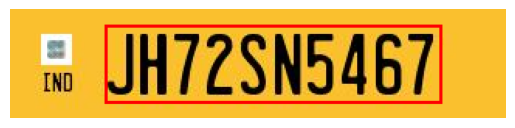

In [34]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# (x1, y1, x2, y2, x3, y3, x4, y4)
bounding_box = [61, 10, 278, 10, 278, 60, 61, 60] 

# Image path
image_path = r"C:\\Users\\HP\\Desktop\\NPR\\train_images\\plate_0001.jpg"  

# Load image
image = Image.open(image_path)
draw = ImageDraw.Draw(image)
draw.polygon(bounding_box, outline='red', width=2)

# plot
plt.imshow(image)
plt.axis('off')  
plt.show()


Check the harware

In [ ]:
import paddle

print("Paddle Version:", paddle.__version__)
print("Is compiled with CUDA:", paddle.is_compiled_with_cuda())
print("Device being used:", paddle.device.get_device())

# List available GPUs
gpu_count = paddle.device.cuda.device_count()
print(f"Number of GPUs available: {gpu_count}")

for i in range(gpu_count):
    print(f"GPU {i}: {paddle.device.cuda.get_device_name(i)}")
